successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful


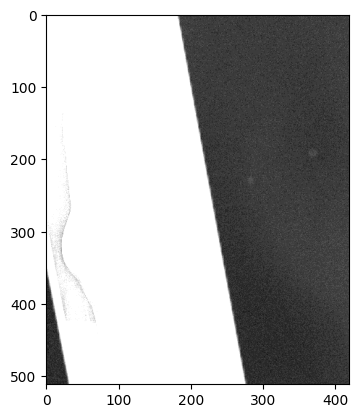

In [1]:
import hough
import cv2
import matplotlib.pyplot as plt
import os


folder_path = '/home/clr/Thesis/pre-processing/sample images/'  
image_output, skipped_images = hough.hough_transform(folder_path)

In [3]:
image_files = os.listdir(folder_path)


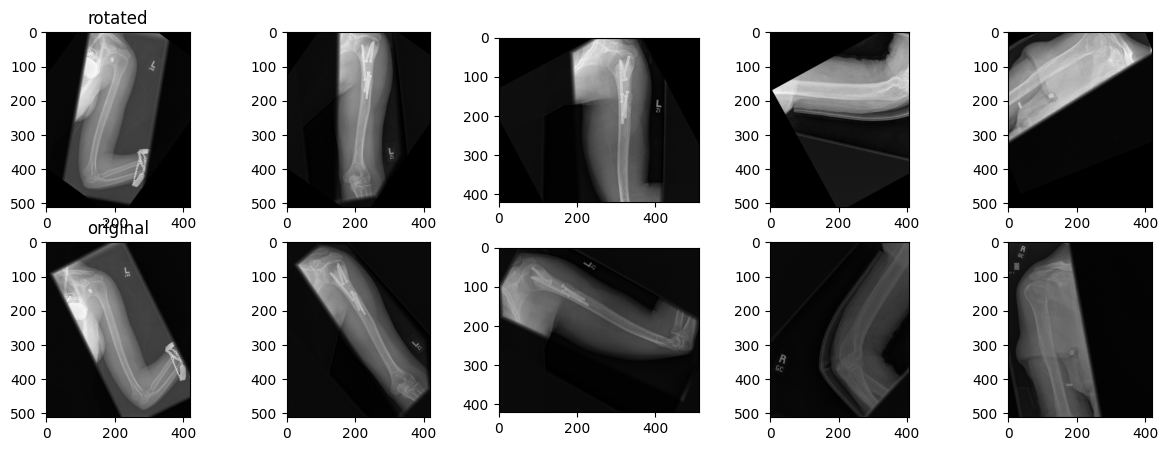

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
ax[0][0].imshow(image_output[0], cmap='gray')
ax[0][0].set_title("rotated")
ax[0][1].imshow(image_output[1], cmap='gray')
ax[0][2].imshow(image_output[2], cmap='gray')
ax[0][3].imshow(image_output[3], cmap='gray')
ax[0][4].imshow(image_output[4], cmap='gray')
ax[1][0].imshow(cv2.imread(folder_path+image_files[0]), cmap='gray')
ax[1][0].set_title("original")
ax[1][1].imshow(cv2.imread(folder_path+image_files[1]), cmap='gray')
ax[1][2].imshow(cv2.imread(folder_path+image_files[2]), cmap='gray')
ax[1][3].imshow(cv2.imread(folder_path+image_files[3]), cmap='gray')
ax[1][4].imshow(cv2.imread(folder_path+image_files[4]), cmap='gray')